In [ ]:
%tensorflow_version 2.x
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [ ]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
response = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=500')
hist = pd.DataFrame(json.loads(response.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [ ]:
hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)

In [ ]:
hist.head(5)

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2020-11-23,18761.66,18010.51,18430.59,48994.17,9.025185e+08,18385.74
2020-11-24,19419.49,18117.78,18385.74,74142.30,1.403473e+09,19157.16
2020-11-25,19488.81,18519.89,19157.16,59989.48,1.141495e+09,18725.76
2020-11-26,18907.31,16270.37,18725.76,129609.34,2.220673e+09,17175.86
2020-11-27,17479.12,16462.87,17175.86,61052.47,1.034427e+09,17155.00


In [ ]:
split_row = len(hist) - int(0.2 * len(hist))
train_data = hist.iloc[:split_row]
test_data = hist.iloc[split_row:]

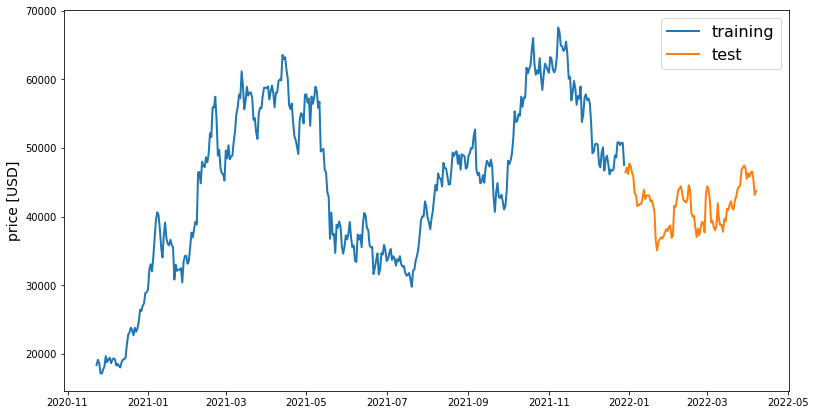

In [ ]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(train[target_col], label='training', linewidth=2)
ax.plot(test[target_col], label='test', linewidth=2)
ax.set_ylabel('price [USD]', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [ ]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [ ]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [ ]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [ ]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [ ]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'
optimizer1 = 'RMSProp'

In [ ]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [ ]:
model = build_lstm_model(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,optimizer=optimizer)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
13/13 [==============================] - 5s 103ms/step - loss: 0.0069 - val_loss: 0.0051
Epoch 2/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0046 - val_loss: 0.0029
Epoch 3/20
13/13 [==============================] - 0s 19ms/step - loss: 0.0043 - val_loss: 0.0027
Epoch 4/20
13/13 [==============================] - 0s 20ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 5/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 6/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 7/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 8/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 9/20
13/13 [==============================] - 0s 23ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 10/20
13/13 [==============================] - 0s 21ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 11

In [ ]:
model1 = build_lstm_model(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,optimizer=optimizer1)
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
13/13 [==============================] - 6s 98ms/step - loss: 0.0092 - val_loss: 0.0040
Epoch 2/20
13/13 [==============================] - 0s 18ms/step - loss: 0.0052 - val_loss: 0.0035
Epoch 3/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0047 - val_loss: 0.0036
Epoch 4/20
13/13 [==============================] - 0s 18ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 5/20
13/13 [==============================] - 0s 30ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 6/20
13/13 [==============================] - 0s 26ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 7/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 8/20
13/13 [==============================] - 0s 18ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 9/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 10/20
13/13 [==============================] - 0s 27ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 11/

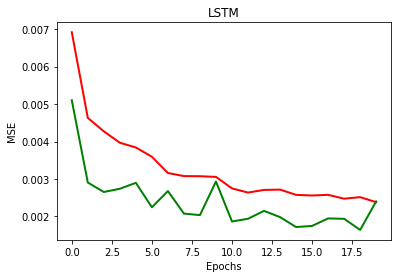

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Train loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

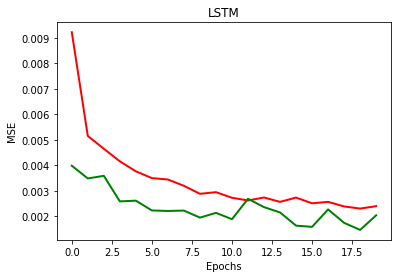

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'],'r',linewidth=2, label='Train loss')
plt.plot(history1.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [ ]:
#model1
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

0.0350412995514839

In [ ]:
#model2
targets = test[target_col][window_len:]
preds1 = model1.predict(X_test).squeeze()
mean_absolute_error(preds1, y_test)

0.03279906440005939

In [ ]:
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(preds, y_test)
MAE

0.0024017298469692495

In [ ]:
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(preds1, y_test)
MAE

0.002041542122698978

In [ ]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, preds)
R2

0.5875997819679462

In [ ]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, preds)
R2

0.5875997819679462

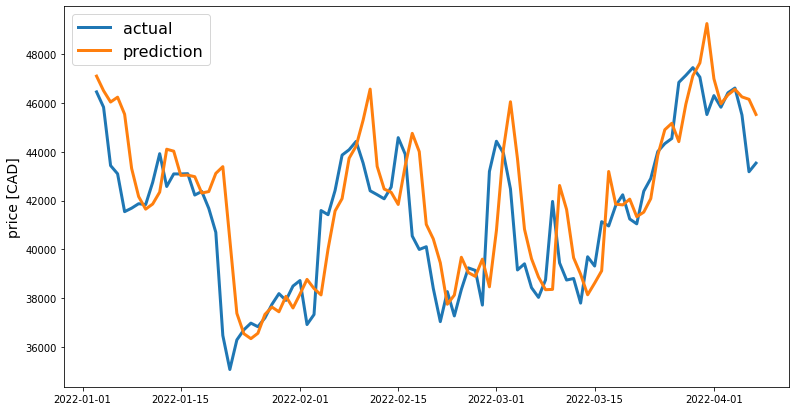

In [ ]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)

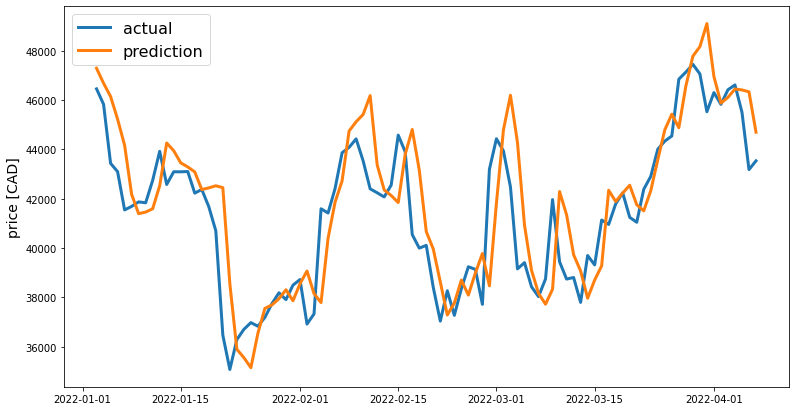

In [ ]:
preds1 = test[target_col].values[:-window_len] * (preds1 + 1)
preds1 = pd.Series(index=targets.index, data=preds1)
line_plot(targets, preds1, 'actual', 'prediction', lw=3)